# Project Task: Week 1

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

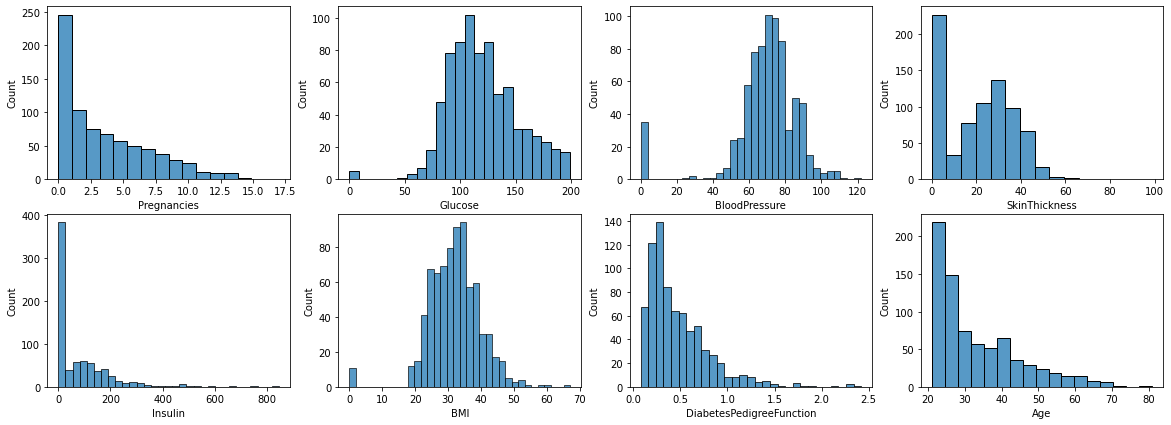

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,7))
sns.histplot(df['Pregnancies'], ax=axes[0,0])
sns.histplot(df['Glucose'], ax=axes[0,1])
sns.histplot(df['BloodPressure'], ax=axes[0,2])
sns.histplot(df['SkinThickness'], ax=axes[0,3])
sns.histplot(df['Insulin'], ax=axes[1,0])
sns.histplot(df['BMI'], ax=axes[1,1])
sns.histplot(df['DiabetesPedigreeFunction'], ax=axes[1,2])
sns.histplot(df['Age'], ax=axes[1,3])
plt.show()

# Observations 1:

* There are columns like Glucose, BloddPressure, Skinthickness, Insulin, BMI in the dataset where we have value as zero. These are missing values as confirmed in the project details.we can  using some missing value handling techniques to handle these zero values.

* It appears that there are some outliers with:
    * the number of times with pregencies
    * BloodPressure
    * SkinThickness
    * Insulin
    * BMI
    * DiabetesPedigreeFunction
* we can handle these ouliers using the IQR method

2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [10]:
# handling missing values and outliers

In [11]:
df_replace_zero = df.copy()

In [12]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_replace_zero[cols] = df_replace_zero[cols].replace(['0', 0], np.nan)

In [13]:
df_replace_zero.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

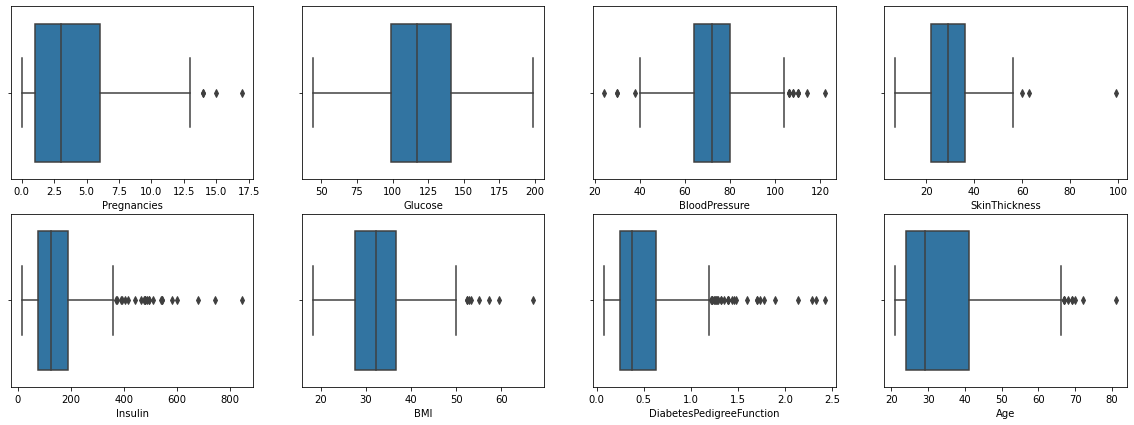

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,7))
sns.boxplot(df_replace_zero['Pregnancies'], ax=axes[0,0])
sns.boxplot(df_replace_zero['Glucose'], ax=axes[0,1])
sns.boxplot(df_replace_zero['BloodPressure'], ax=axes[0,2])
sns.boxplot(df_replace_zero['SkinThickness'], ax=axes[0,3])
sns.boxplot(df_replace_zero['Insulin'], ax=axes[1,0])
sns.boxplot(df_replace_zero['BMI'], ax=axes[1,1])
sns.boxplot(df_replace_zero['DiabetesPedigreeFunction'], ax=axes[1,2])
sns.boxplot(df_replace_zero['Age'], ax=axes[1,3])
plt.show()

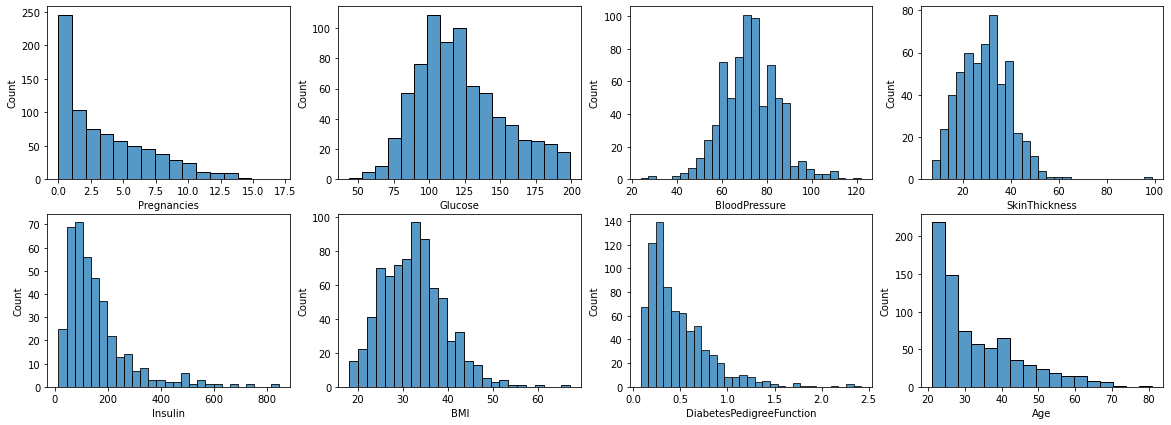

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,7))
sns.histplot(df_replace_zero['Pregnancies'], ax=axes[0,0])
sns.histplot(df_replace_zero['Glucose'], ax=axes[0,1])
sns.histplot(df_replace_zero['BloodPressure'], ax=axes[0,2])
sns.histplot(df_replace_zero['SkinThickness'], ax=axes[0,3])
sns.histplot(df_replace_zero['Insulin'], ax=axes[1,0])
sns.histplot(df_replace_zero['BMI'], ax=axes[1,1])
sns.histplot(df_replace_zero['DiabetesPedigreeFunction'], ax=axes[1,2])
sns.histplot(df_replace_zero['Age'], ax=axes[1,3])
plt.show()

## Handling Missing values-Approach: 
    # we see that most of the missing values are in SkinThickness and Insulin columns. 
    # However, we can apply  SimpleImputer to handle the missing values from all these columns(Glucose, BloodPressure,SkinThickness, Insulin and BMI)
    # we can take the mean byremoving the missing value rows from these columns and impute the missing values using the mean

In [16]:
df_new = df_replace_zero.copy()
df_new.shape

(768, 9)

In [17]:
#checking the mean of each variable grouped by Outcome (diabetic or non diabetic)
df_new.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [18]:
# diabetic dataframe
df_diabetic = df_new[df_new['Outcome']==1]
print(df_diabetic.shape)
df_diabetic['Outcome'].value_counts()

(268, 9)


1    268
Name: Outcome, dtype: int64

In [19]:
# diabetic dataframe
df_non_diabetic = df_new[df_new['Outcome']==0]
print(df_non_diabetic.shape)
df_non_diabetic['Outcome'].value_counts()

(500, 9)


0    500
Name: Outcome, dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp_num = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [22]:
#imputing
df_diabetic[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']] = imp_num.fit_transform(df_diabetic[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']])

In [23]:
#imputing
df_non_diabetic[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']] = imp_num.fit_transform(df_non_diabetic[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']])

In [24]:
df_new_1 = pd.concat([df_diabetic,df_non_diabetic], ignore_index=True)

In [25]:
df_new_1.shape

(768, 9)

In [26]:
df_new_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
2,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
3,3,78.0,50.0,32.0,88.000000,31.0,0.248,26,1
4,2,197.0,70.0,45.0,543.000000,30.5,0.158,53,1


In [27]:
df_new_1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df_new_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


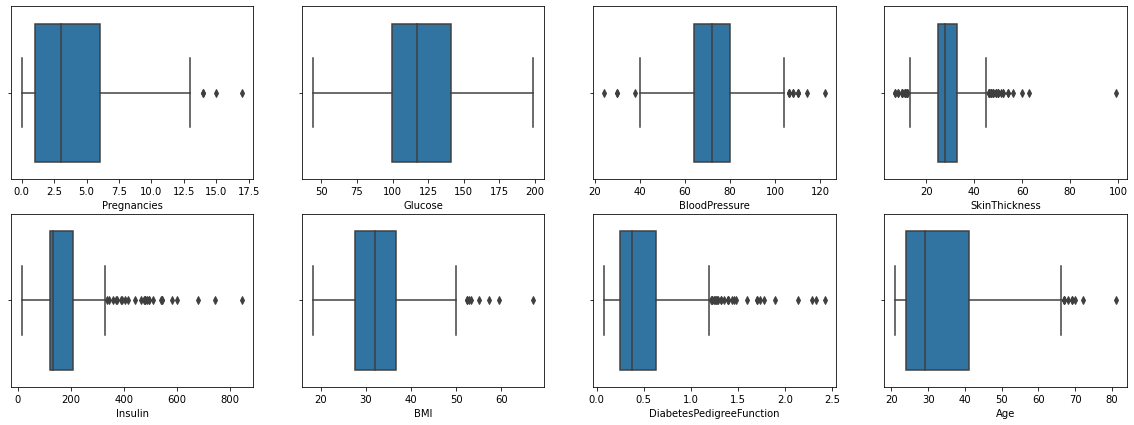

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,7))
sns.boxplot(df_new_1['Pregnancies'], ax=axes[0,0])
sns.boxplot(df_new_1['Glucose'], ax=axes[0,1])
sns.boxplot(df_new_1['BloodPressure'], ax=axes[0,2])
sns.boxplot(df_new_1['SkinThickness'], ax=axes[0,3])
sns.boxplot(df_new_1['Insulin'], ax=axes[1,0])
sns.boxplot(df_new_1['BMI'], ax=axes[1,1])
sns.boxplot(df_new_1['DiabetesPedigreeFunction'], ax=axes[1,2])
sns.boxplot(df_new_1['Age'], ax=axes[1,3])
plt.show()

## Handling Outliers-Approach: 
    # we see that, there are outliers with:
        *the number of times with pregencies
        *BloodPressure
        *SkinThickness
        *Insulin
        *BMI
        *DiabetesPedigreeFunction

    # we can handle these ouliers using the IQR method


In [30]:
df_new_2 = df_new_1.copy()
df_new_2.shape

(768, 9)

In [31]:
# Pregnancies outliers
Q1 = df_new_2['Pregnancies'].describe().at['25%']
Q2 = df_new_2['Pregnancies'].describe().at['50%']
Q3 = df_new_2['Pregnancies'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

df_new_2['Pregnancies'] = np.where(df_new_2['Pregnancies']>UTV, Q2,df_new_2['Pregnancies'])

-6.5
13.5
3.0


In [32]:
#Blood Pressure outliers
Q1 = df_new_2['BloodPressure'].describe().at['25%']
Q2 = df_new_2['BloodPressure'].describe().at['50%']
Q3 = df_new_2['BloodPressure'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

40.0
104.0
72.0


In [33]:
df_new_2['BloodPressure'] = np.where(df_new_2['BloodPressure']<LTV , Q2,df_new_2['BloodPressure'])
df_new_2['BloodPressure'] = np.where(df_new_2['BloodPressure']>UTV , Q2,df_new_2['BloodPressure'])

In [34]:
#SkinThickness outliers
Q1 = df_new_2['SkinThickness'].describe().at['25%']
Q2 = df_new_2['SkinThickness'].describe().at['50%']
Q3 = df_new_2['SkinThickness'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

13.0
45.0
28.0


In [35]:
df_new_2['SkinThickness'] = np.where(df_new_2['SkinThickness']<LTV , Q2,df_new_2['SkinThickness'])
df_new_2['SkinThickness'] = np.where(df_new_2['SkinThickness']>UTV , Q2,df_new_2['SkinThickness'])

In [36]:
#Insulin outliers
Q1 = df_new_2['Insulin'].describe().at['25%']
Q2 = df_new_2['Insulin'].describe().at['50%']
Q3 = df_new_2['Insulin'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

-6.519230769230774
334.86538461538464
130.28787878787878


In [37]:
df_new_2['Insulin'] = np.where(df_new_2['Insulin']<LTV , Q2,df_new_2['Insulin'])
df_new_2['Insulin'] = np.where(df_new_2['Insulin']>UTV , Q2,df_new_2['Insulin'])

In [38]:
df_new_2['Insulin'].describe()

count    768.000000
mean     144.322241
std       57.731263
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      330.000000
Name: Insulin, dtype: float64

In [39]:
#BMI outliers
Q1 = df_new_2['BMI'].describe().at['25%']
Q2 = df_new_2['BMI'].describe().at['50%']
Q3 = df_new_2['BMI'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

13.849999999999998
50.25
32.05


In [40]:
df_new_2['BMI'] = np.where(df_new_2['BMI']<LTV , Q2,df_new_2['BMI'])
df_new_2['BMI'] = np.where(df_new_2['BMI']>UTV , Q2,df_new_2['BMI'])

In [41]:
#DiabetesPedigreeFunction outliers
Q1 = df_new_2['DiabetesPedigreeFunction'].describe().at['25%']
Q2 = df_new_2['DiabetesPedigreeFunction'].describe().at['50%']
Q3 = df_new_2['DiabetesPedigreeFunction'].describe().at['75%']
IQR = Q3-Q1
IQR
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
print(LTV)
print(UTV)
print(Q2)

-0.32999999999999996
1.2
0.3725


In [42]:
df_new_2['DiabetesPedigreeFunction'] = np.where(df_new_2['DiabetesPedigreeFunction']<LTV , Q2,df_new_2['DiabetesPedigreeFunction'])
df_new_2['DiabetesPedigreeFunction'] = np.where(df_new_2['DiabetesPedigreeFunction']>UTV , Q2,df_new_2['DiabetesPedigreeFunction'])

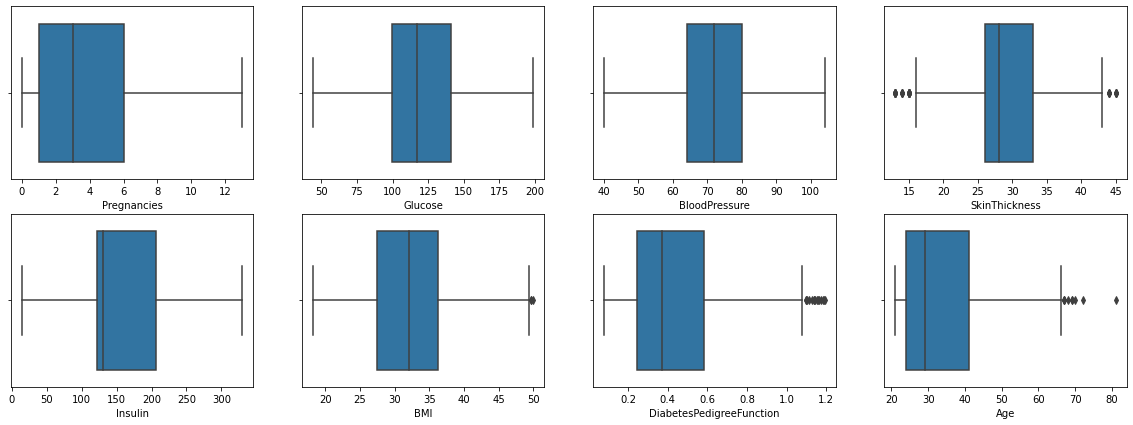

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,7))
sns.boxplot(df_new_2['Pregnancies'], ax=axes[0,0])
sns.boxplot(df_new_2['Glucose'], ax=axes[0,1])
sns.boxplot(df_new_2['BloodPressure'], ax=axes[0,2])
sns.boxplot(df_new_2['SkinThickness'], ax=axes[0,3])
sns.boxplot(df_new_2['Insulin'], ax=axes[1,0])
sns.boxplot(df_new_2['BMI'], ax=axes[1,1])
sns.boxplot(df_new_2['DiabetesPedigreeFunction'], ax=axes[1,2])
sns.boxplot(df_new_2['Age'], ax=axes[1,3])
plt.show()

In [44]:
df_new_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.697358,72.149495,28.814751,144.322241,32.194988,0.427667,33.240885,0.348958
std,3.270644,30.462008,10.885698,6.795527,57.731263,6.414232,0.245162,11.760232,0.476951
min,0.000000,44.000000,40.000000,13.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,26.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.025000,0.371750,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.300000,0.582250,41.000000,1.000000
max,13.000000,199.000000,104.000000,45.000000,330.000000,50.000000,1.191000,81.000000,1.000000


3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


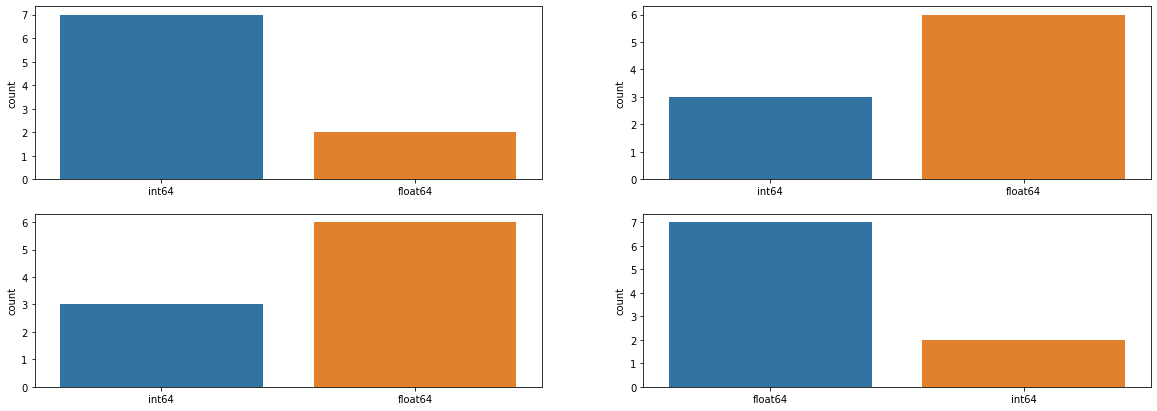

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
sns.countplot(df.dtypes.map(str), ax=axes[0,0])
sns.countplot(df_replace_zero.dtypes.map(str), ax=axes[0,1])
sns.countplot(df_new_1.dtypes.map(str), ax=axes[1,0])
sns.countplot(df_new_2.dtypes.map(str), ax=axes[1,1])
plt.show()


In [47]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Observations 2:

* The data types in the original dataset are mostly Intergers and only two columns (BMI and DiabetesPedigreeFunction) are float dat types

* After treating the missing values and outliers, we see that the data types are now mostly float and only Age and Outcome which we did not treat are of Integer data types


###################################################################################################################

# Project Task: Week 2

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

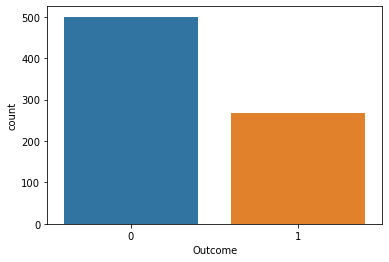

In [48]:
sns.countplot(df_new_2['Outcome'])

In [49]:
df_new_2['Outcome'].value_counts()/df_new_2['Outcome'].shape

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Observations 3:

* We see that 65% of the data are 0 ( non diabetic) and 35% of the data are 1 ( diabetic)
* we have good split of the diagnosis in the data sets
* we can use this composition of the data set to split the further into train and test data sets for model testing

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

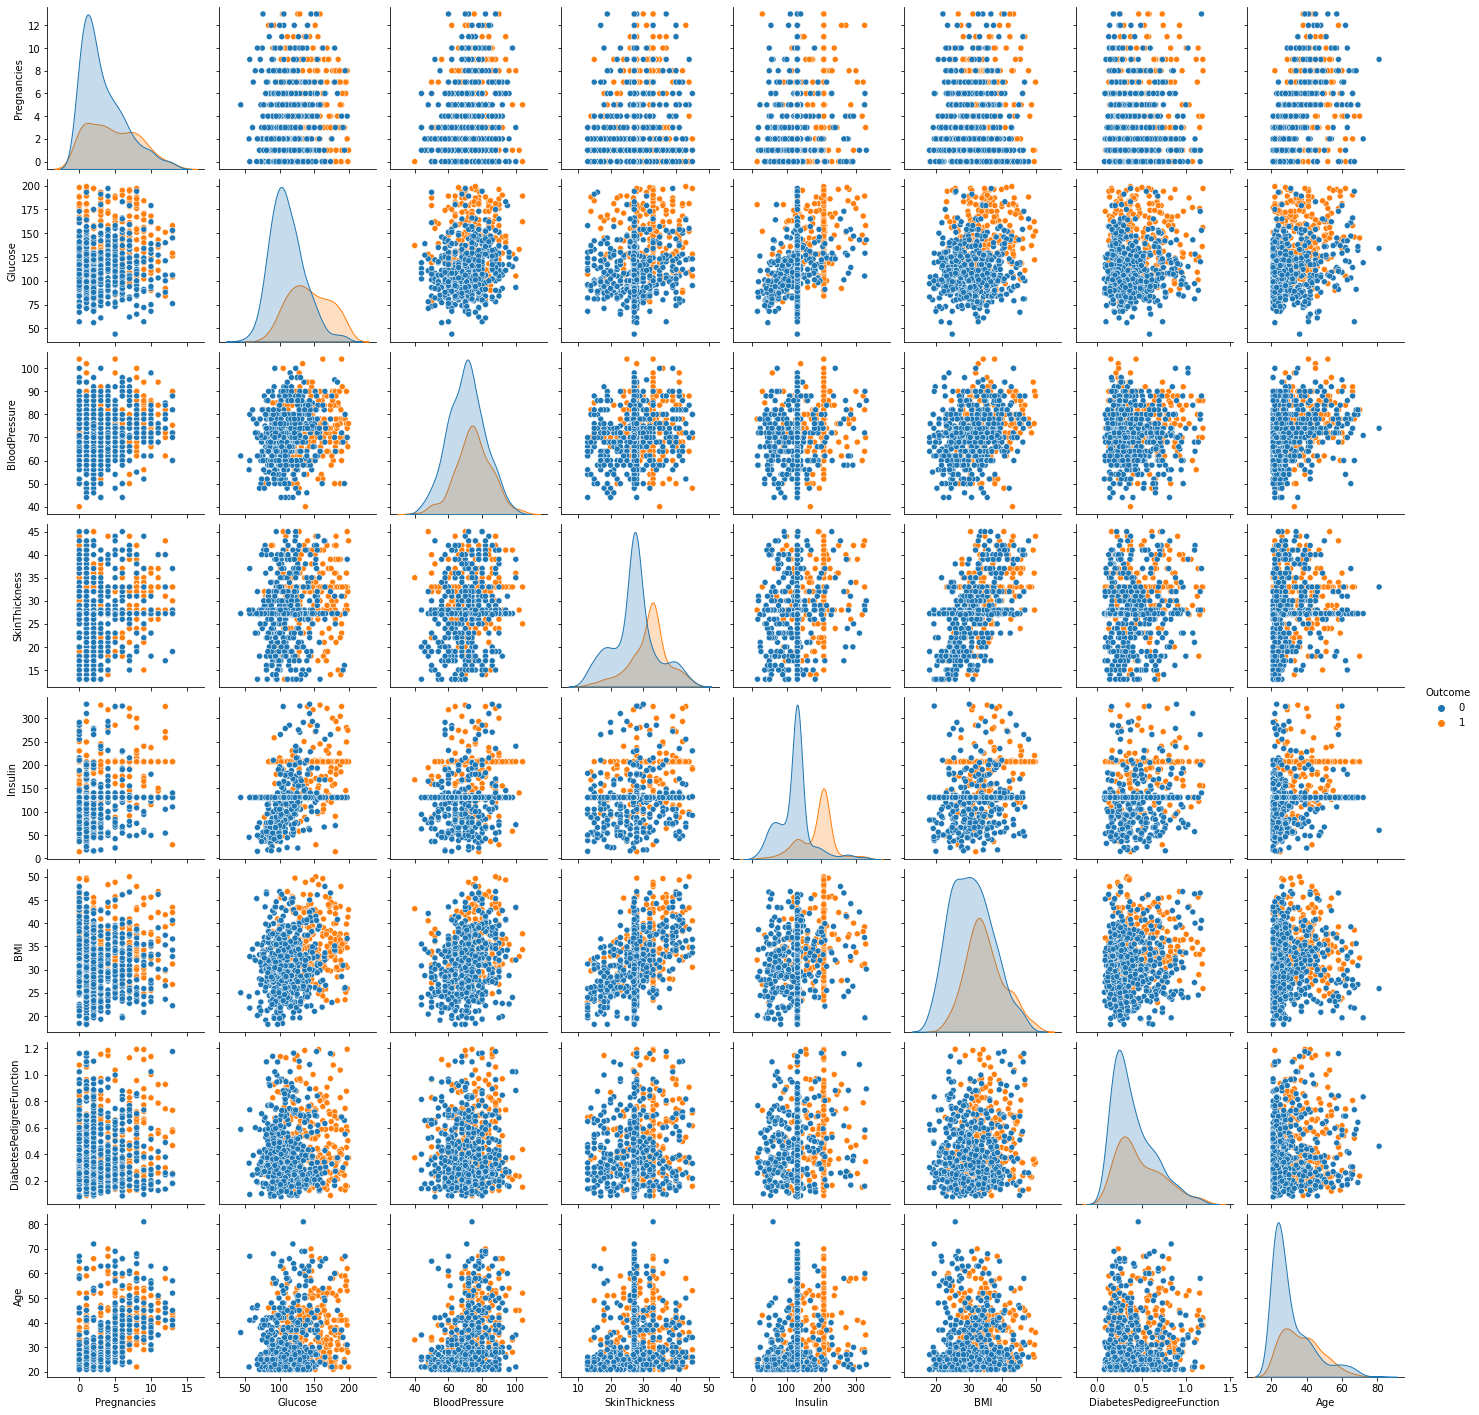

In [50]:
sns.pairplot(df_new_2, hue='Outcome')

# Observations 4:
* We see some positive correlation between Age & Pregnancies, Age & Glucose, Age & BloodPressure and Age & BMI
* We see some positive correlation between Insulin & Glucose and BMI & Glucose
* We see some positive correlation between SkinThickness & BMI

3. Perform correlation analysis. Visually explore it using a heat map.

In [51]:
df_new_2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.119433,0.189145,0.142816,0.183254,0.031141,0.004519,0.543776,0.202492
Glucose,0.119433,1.000000,0.214425,0.202400,0.463258,0.232486,0.083017,0.268566,0.495954
BloodPressure,0.189145,0.214425,1.000000,0.187478,0.174236,0.268104,0.034228,0.313693,0.176805
SkinThickness,0.142816,0.202400,0.187478,1.000000,0.290381,0.501560,0.083416,0.129118,0.310001
Insulin,0.183254,0.463258,0.174236,0.290381,1.000000,0.268149,0.105226,0.230793,0.524814
BMI,0.031141,0.232486,0.268104,0.501560,0.268149,1.000000,0.123591,0.051756,0.303928
DiabetesPedigreeFunction,0.004519,0.083017,0.034228,0.083416,0.105226,0.123591,1.000000,0.050262,0.151994
Age,0.543776,0.268566,0.313693,0.129118,0.230793,0.051756,0.050262,1.000000,0.238356
Outcome,0.202492,0.495954,0.176805,0.310001,0.524814,0.303928,0.151994,0.238356,1.000000


<AxesSubplot:>

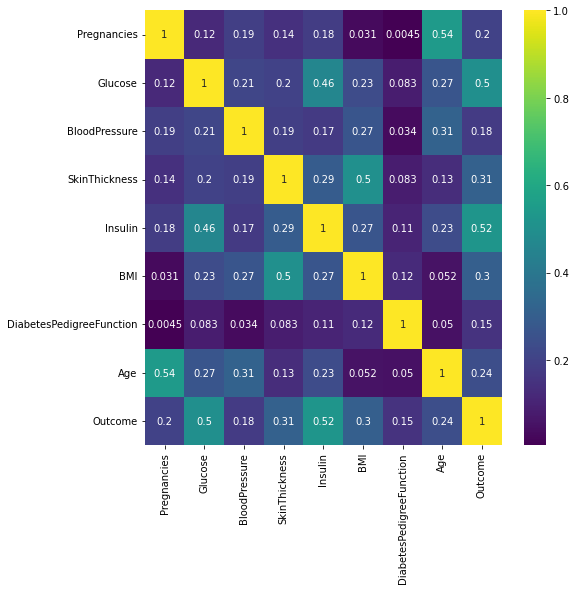

In [52]:
plt.subplots(figsize=(8,8))
sns.heatmap(df_new_2.corr(),annot=True,cmap='viridis')

# Observations 5:
* Based on the correlation heatmap, we see there is not much multicolinearit among the  variables
* We also see that there is compariatively strong correlation between Glucose and the outcome and Insulin and the Outcome with slight signigicant coorelation between Skinthickness,BMI and Age and the Outcome.

###################################################################################################################

# Project Task: Week 3

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

# Observations 6:
* Since this is a Classification problem, we can try using various classification models like:
    * Logistic Regression
    * Decision Tree classifier
    * Raandom Forest Classifier
    * SVC
    * KNN Classifier,
to predict the outcome usig the variables
* We can use various metrics like Accuracy, Precision, Recall, AUC to test the accuracy of the model and compare various models to decide on the best model

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [53]:
df_new_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.6270,50,1
1,8.0,183.0,64.0,33.0,206.846154,23.3,0.6720,32,1
2,0.0,137.0,40.0,35.0,168.000000,43.1,0.3725,33,1
3,3.0,78.0,50.0,32.0,88.000000,31.0,0.2480,26,1
4,2.0,197.0,70.0,45.0,130.287879,30.5,0.1580,53,1


In [54]:
X = df_new_2.drop(['Outcome'],axis=1)
y = df_new_2['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [55]:
#Scaling the data so that each feature has a single unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.67842689,  0.86401998, -0.01374212, ...,  0.21918882,
         0.81359378,  1.4259954 ],
       [ 1.29032571,  2.01374094, -0.74913026, ..., -1.38766184,
         0.99726522, -0.10558415],
       [-1.15726958,  0.5026791 , -2.95529469, ...,  1.70123554,
        -0.22517023, -0.0204964 ],
       ...,
       [-0.54537076,  0.00994155, -0.19758916, ...,  0.71840456,
        -0.35782183, -0.53102292],
       [ 0.37247747, -0.02290762, -0.01374212, ..., -0.93524757,
        -0.74557264, -0.27575966],
       [-0.85132017, -0.94268439, -0.19758916, ..., -0.28002692,
        -0.45986151, -0.87137393]])

In [56]:
# Training and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.8,stratify=y, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


#### Model 1 : Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train)
y_pred_lr = logRegModel.predict(X_test)

In [58]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [59]:
print(logRegModel.score(X_train,y_train))
print(logRegModel.score(X_test,y_test))

0.8224755700325733
0.8896103896103896


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score: ',accuracy_score(y_pred_lr, y_test))
print('Precision score: ',precision_score(y_test,y_pred_lr))
print('Recall score: ',recall_score(y_test,y_pred_lr))
print('Confusion matrix:')
print(confusion_matrix(y_pred_lr, y_test))
print(classification_report(y_test, y_pred_lr))

Accuracy score:  0.8896103896103896
Precision score:  0.8775510204081632
Recall score:  0.7962962962962963
Confusion matrix:
[[94 11]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.88      0.80      0.83        54

    accuracy                           0.89       154
   macro avg       0.89      0.87      0.88       154
weighted avg       0.89      0.89      0.89       154



In [61]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.868148148148148


#### Model 2 : Decision Tree Classifier

In [62]:
#Hyper Parameter tuning of max_dept
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(3,20):
    print("For max_depth = ",i)
    DTModel = DecisionTreeClassifier(max_depth=i)
    DTModel.fit(X_train,y_train)
    y_pred_DT = DTModel.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

For max_depth =  3
Accuracy: 0.8636363636363636
For max_depth =  4
Accuracy: 0.8766233766233766
For max_depth =  5
Accuracy: 0.8701298701298701
For max_depth =  6
Accuracy: 0.8636363636363636
For max_depth =  7
Accuracy: 0.8571428571428571
For max_depth =  8
Accuracy: 0.8441558441558441
For max_depth =  9
Accuracy: 0.8311688311688312
For max_depth =  10
Accuracy: 0.8571428571428571
For max_depth =  11
Accuracy: 0.8571428571428571
For max_depth =  12
Accuracy: 0.8441558441558441
For max_depth =  13
Accuracy: 0.8376623376623377
For max_depth =  14
Accuracy: 0.8441558441558441
For max_depth =  15
Accuracy: 0.8441558441558441
For max_depth =  16
Accuracy: 0.8441558441558441
For max_depth =  17
Accuracy: 0.8506493506493507
For max_depth =  18
Accuracy: 0.8441558441558441
For max_depth =  19
Accuracy: 0.8441558441558441


Highest Accuracy of Decision Tree Model can be obtained on Max_Depth = 4, which is 0.88

In [63]:
DTModel = DecisionTreeClassifier(max_depth=4)
DTModel.fit(X_train,y_train)
y_pred_DT = DTModel.predict(X_test)

In [64]:
print(DTModel.score(X_train,y_train))
print(DTModel.score(X_test,y_test))

0.9120521172638436
0.8766233766233766


In [65]:
print('Accuracy score: ',accuracy_score(y_pred_DT, y_test))
print('Precision score: ',precision_score(y_test,y_pred_DT))
print('Recall score: ',recall_score(y_test,y_pred_DT))
print('Confusion matrix:')
print(confusion_matrix(y_pred_DT, y_test))
print(classification_report(y_test, y_pred_DT))

Accuracy score:  0.8766233766233766
Precision score:  0.7966101694915254
Recall score:  0.8703703703703703
Confusion matrix:
[[88  7]
 [12 47]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       100
           1       0.80      0.87      0.83        54

    accuracy                           0.88       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.88      0.88      0.88       154



In [66]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.8751851851851851


#### Model 3 : Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [68]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.9025974025974026


In [69]:
print('Accuracy score: ',accuracy_score(y_pred_rf, y_test))
print('Precision score: ',precision_score(y_test,y_pred_rf))
print('Recall score: ',recall_score(y_test,y_pred_rf))
print('Confusion matrix:')
print(confusion_matrix(y_pred_rf, y_test))
print(classification_report(y_test, y_pred_rf))

Accuracy score:  0.9025974025974026
Precision score:  0.8823529411764706
Recall score:  0.8333333333333334
Confusion matrix:
[[94  9]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.88      0.83      0.86        54

    accuracy                           0.90       154
   macro avg       0.90      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.8866666666666667


In [71]:
# Check the accuracy using random forest with cross validation.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [73]:
rfc=RandomForestClassifier(random_state=42)
parameters={'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid=zip([rfc],[parameters])

In [74]:
best_=None

for i, j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(X_train, y_train)
    if best_ is None:
        best_=a
    elif a.best_score_>best_.best_score_:
        best_=a
        
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

Best CV Score 0.8664275466284074
Model Parameters {'max_depth': 15, 'n_estimators': 50}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)


In [75]:
RFC=best_.best_estimator_
Model=RFC.fit(X_train, y_train)
pred=Model.predict(X_test)

In [76]:
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

1.0
0.8896103896103896


In [77]:
print('Accuracy score: ',accuracy_score(pred, y_test))
print('Precision score: ',precision_score(pred, y_test))
print('Recall score: ',recall_score(pred, y_test))
print('Confusion matrix:')
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

Accuracy score:  0.8896103896103896
Precision score:  0.8333333333333334
Recall score:  0.8490566037735849
Confusion matrix:
[[92  9]
 [ 8 45]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       101
           1       0.83      0.85      0.84        53

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154



In [78]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.8766666666666668


#### Model 4: Support Vector Classifier

In [79]:
from sklearn.svm import SVC
SVMmodel = SVC(kernel='rbf',
gamma='auto')
SVMmodel.fit(X_train,y_train)

SVC(gamma='auto')

In [80]:
y_pred_sv = SVMmodel.predict(X_test)

In [81]:
print(SVMmodel.score(X_train,y_train))
print(SVMmodel.score(X_test,y_test))

0.8859934853420195
0.8831168831168831


In [82]:
print('Accuracy score: ',accuracy_score(y_pred_sv, y_test))
print('Precision score: ',precision_score(y_test,y_pred_sv))
print('Recall score: ',recall_score(y_test,y_pred_sv))
print('Confusion matrix:')
print(confusion_matrix(y_pred_sv, y_test))
print(classification_report(y_test, y_pred_sv))

Accuracy score:  0.8831168831168831
Precision score:  0.8913043478260869
Recall score:  0.7592592592592593
Confusion matrix:
[[95 13]
 [ 5 41]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       100
           1       0.89      0.76      0.82        54

    accuracy                           0.88       154
   macro avg       0.89      0.85      0.87       154
weighted avg       0.88      0.88      0.88       154



In [83]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_sv)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.8546296296296296


#### Model 5: KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7,
metric='minkowski',
p = 2)
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [85]:
y_pred_knn = knnClassifier.predict(X_test)

In [86]:
print(knnClassifier.score(X_train,y_train))
print(knnClassifier.score(X_test,y_test))

0.8680781758957655
0.8571428571428571


In [87]:
print('Accuracy score: ',accuracy_score(y_pred_knn, y_test))
print('Precision score: ',precision_score(y_test,y_pred_knn))
print('Recall score: ',recall_score(y_test,y_pred_knn))
print('Confusion matrix:')
print(confusion_matrix(y_pred_knn, y_test))
print(classification_report(y_test, y_pred_knn))

Accuracy score:  0.8571428571428571
Precision score:  0.8333333333333334
Recall score:  0.7407407407407407
Confusion matrix:
[[92 14]
 [ 8 40]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       100
           1       0.83      0.74      0.78        54

    accuracy                           0.86       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [88]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC: ',roc_auc)

ROC_AUC:  0.8303703703703704


## Model comparsion

LR:
Accuracy score:  0.8896103896103896,
Precision score:  0.8775510204081632,
Recall score:  0.7962962962962963,
Confusion matrix:
  [[94 11]
  [ 6 43]],
ROC_AUC:  0.868148148148148

DT:
Accuracy score:  0.8766233766233766,
Precision score:  0.7966101694915254,
Recall score:  0.8703703703703703,
Confusion matrix:,
[[88  7]
 [12 47]],
ROC_AUC:  0.8751851851851851


RF_1: without CV:
Accuracy score:  0.8766233766233766,
Precision score:  0.8431372549019608,
Recall score:  0.7962962962962963,
Confusion matrix:
[[92 11]
 [ 8 43]],
ROC_AUC:  0.8866666666666667

RF_2: with CV:
Accuracy score:  0.8896103896103896,
Precision score:  0.8333333333333334,
Recall score:  0.8490566037735849,
Confusion matrix:
[[92  9]
 [ 8 45]],
ROC_AUC:  0.8766666666666668

SVM:
Accuracy score:  0.8831168831168831,
Precision score:  0.8913043478260869,
Recall score:  0.7592592592592593,
Confusion matrix:
[[95 13]
 [ 5 41]],
ROC_AUC:  0.8546296296296296

KNN:
Accuracy score:  0.8571428571428571,
Precision score:  0.8333333333333334,
Recall score:  0.7407407407407407,
Confusion matrix:
[[92 14]
 [ 8 40]],
ROC_AUC:  0.8303703703703704


# Observations 7:
* Comapring various classification models we see that , Random Forest Classifier with Cross valdation is best performing model with this dataset, as it gives the highies accuracy with Good Precision and Recall score:

RF_2: with CV: 
* Accuracy score: 0.8896103896103896,
* Precision score: 0.8333333333333334,
* Recall score: 0.8490566037735849,
* Confusion matrix: 
    [[92 9] 
    [8 45]],
* ROC_AUC: 0.8766666666666668

Whereas KNN model gives the least accuracy score with this dataset

KNN: 
* Accuracy score: 0.8571428571428571, 
* Precision score: 0.8333333333333334, 
* Recall score: 0.7407407407407407, 
* Confusion matrix: [[92 14] [ 8 40]], 
* ROC_AUC: 0.8303703703703704

# Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [89]:
conf_matrix_lr=confusion_matrix(y_pred_lr, y_test)
conf_matrix_DT=confusion_matrix(y_pred_DT, y_test)
conf_matrix_rf=confusion_matrix(y_pred_rf, y_test)
conf_matrix_rf_cv=confusion_matrix(pred, y_test)
conf_matrix_sv=confusion_matrix(y_pred_sv, y_test)
conf_matrix_knn=confusion_matrix(y_pred_knn, y_test)

In [90]:
# Creating a function to report confusion metrics

def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]  
    
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))    
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [97]:
print('Logistic Regression')
print(confusion_metrics (conf_matrix_lr))
print('***************************************************')
print('Decision Tree')
print(confusion_metrics (conf_matrix_DT))
print('***************************************************')
print('Random Forest without CV')
print(confusion_metrics (conf_matrix_rf))
print('***************************************************')
print('Random Forest with CV')
print(confusion_metrics (conf_matrix_rf_cv))
print('***************************************************')
print('Support Vector')
print(confusion_metrics (conf_matrix_sv))
print('***************************************************')
print('KNN')
print(confusion_metrics (conf_matrix_knn))

Logistic Regression
True Positives: 43
True Negatives: 94
False Positives: 11
False Negatives: 6
--------------------------------------------------
Accuracy: 0.89
Mis-Classification: 0.11
Sensitivity: 0.88
Specificity: 0.9
Precision: 0.9
f_1 Score: 0.89
None
***************************************************
Decision Tree
True Positives: 47
True Negatives: 88
False Positives: 7
False Negatives: 12
--------------------------------------------------
Accuracy: 0.88
Mis-Classification: 0.12
Sensitivity: 0.8
Specificity: 0.93
Precision: 0.93
f_1 Score: 0.86
None
***************************************************
Random Forest without CV
True Positives: 45
True Negatives: 94
False Positives: 9
False Negatives: 6
--------------------------------------------------
Accuracy: 0.9
Mis-Classification: 0.1
Sensitivity: 0.88
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.9
None
***************************************************
Random Forest with CV
True Positives: 45
True Negatives: 92
False Pos

# Observations 8:
 * manually calculating the Sensitivity and Specificity, gives us that Random forest model is a better performing model

In [98]:
# Plotting the AUC(ROC) curve for each of the testted model

AUC: 0.868


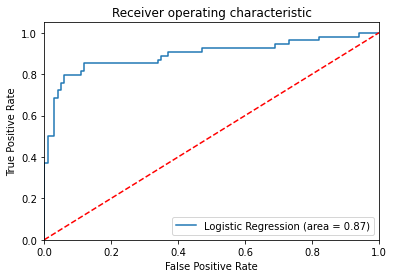

In [99]:
# ROC for Logistic Regression Model:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()

AUC: 0.875


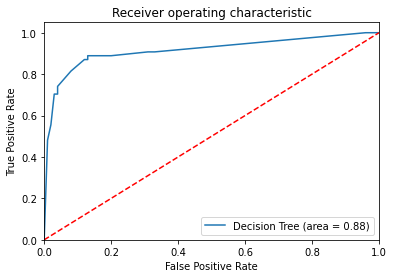

In [100]:
# ROC for Decision Tree Model:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

AUC: 0.887


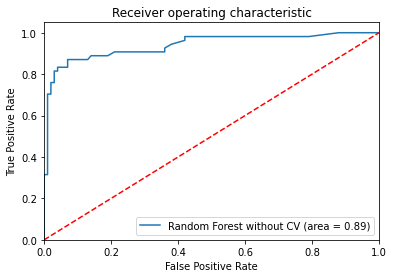

In [101]:
# ROC for Random Forest without CV Model:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest without CV (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('RF1_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

AUC: 0.877


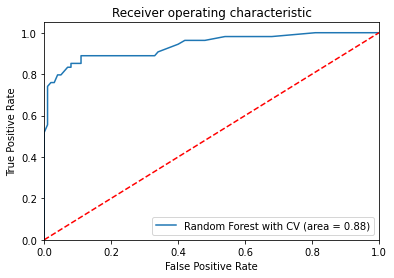

In [102]:
# ROC for Random Forest with CV Model:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_cv_roc_auc = roc_auc_score(y_test, Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest with CV (area = %0.2f)' % rf_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('RF2_ROC')
print('AUC: %.3f' % rf_cv_roc_auc)
plt.show()

AUC: 0.830


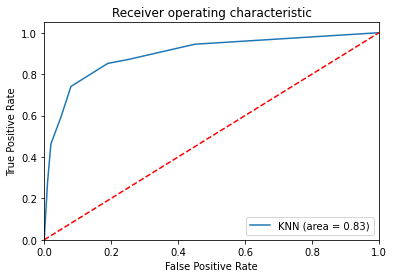

In [106]:
# ROC for SV Model:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knnClassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knnClassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('RF2_ROC')
print('AUC: %.3f' % knn_roc_auc)
plt.show()

# Observations 9:
 * Checking the ROC curves, we see that the best fit ROC curve is for Random Forest Classifier model.

# Conclusion:

    * The given dataset is a very small dataset (769 rows and 9 columns) for predicting whether the patient is Dibetic or Non Deobtetic based on the variables (Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI,DiabetesPedigreeFunction and Age) provided
    
    * Columns Glucose, Blood Pressure, SkinThickness, Insulin and BMI has some values as Zero, and were considred to be missing values. These missing values were handled by replacing with the mean of each "Outcome" category (1 or 0)
    
    * There were also some outliers in columns Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI and DiabetesPedigreeFunction. These outliers were handled by replacing with the "Median" values for each of the variables.
    
    * Scatter pair plot and Correlation matrix was created to check the colinearity among variables and also to check the  correlation between the varaibles and outcome. 
        * Based on the correlation heatmap, we see there is not much multicolinearity among the variables
        * We also see that there is compariatively strong correlation between Glucose and the outcome and Insulin and the Outcome with slight signigicant coorelation between Skinthickness,BMI and Age and the Outcome.
        
     * Various Classification models (Logistic Regression, Decision Tree Classifier, Random forest, SVM and KNN) were used and compared to check the best performing model.
     
     * Comparing the accuracy scores, Precision, recall, sensitivity, Specicifity and ROC curves, we concluded that
     Random Forest Model, performs the best as compared to all other Classifiction models  being used with this data set.
     
     * we have also used  Grid Search Cross validation,and other Model parameters like max_depth, n_estimators) to enchance the performance of the model. 
     
     * Overall we see that there is not signficant performance difference betwee the Random forest Model performance with or Without cross valudation. However as compared to other Models, we do see that the Random forest model is best performing ( as evident with the accuracy score, Sensitivity and Specificity and ROC Curve).

# Builing a Predictive System

In [118]:
#input_data = (4,110,92,0,0,37.6,0.191,30)
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_numpy_array = np.asarray(input_data)
input_data_numpy_array
input_data_numpy_array = np.asarray(input_data)
input_data_numpy_array

array([  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
        51.   ])

In [119]:
input_data_reshaped = input_data_numpy_array.reshape(1,-1)
input_data_reshaped

array([[  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])

In [120]:
# Standardising the input data
std_data = scaler.transform(input_data_reshaped)
std_data

array([[ 0.37247747,  1.45530504, -0.01374212, -1.44523696,  0.53173531,
        -0.99764954,  0.65033028,  1.51108316]])

In [121]:
prediction = Model.predict(std_data)
print(prediction)

[1]


In [122]:
if (prediction[0]==0):
    print('The patient is Non-diabetic')
else:
    print('The patient is Diabetic')

The patient is Diabetic


In [123]:
# Exporting the cleaned up data for tableau dashboard

df_new_2.to_csv("health care diabetes_cleaned_data.csv")

# Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

### Link to Tableau dashboard

https://public.tableau.com/views/Project2_DiabetesDataset/DataScienceCapstoneProject2-HealthCare?:language=en-US&:display_count=n&:origin=viz_share_link

In [ ]:
##### End of Project #########